# Three-Side Market Basic

![](images/3SidedMarketBasicDemo.png)

The ‘Three-Sided Market’ model is for platform business where the product being produced enables transactions between a service provider and service consumer. The reference example for this case is a ride sharing app such as Uber. In this case drivers would be providers and riders would be consumers. The corporation Uber is the producer, and in our three-sided-market that role will be spread to a decentralized community collectively providing all of the functions required for users (providers and consumers) to have an equivalent user experience. 

This work is part of the ongoing economic systems research at BlockScience. We would be thrilled to have you build on our work, but please cite us if you do. 
Models presented are not predictions or final designs, merely 'what-if' explorations of complex sociotechnical systems. Contact media@block.science with interest in our methods and tools.

## Building a Model of a Three-Sided Market

To construct our model, we will use our internally developed simulation tool called cadCAD.

cadCAD is a differential games based simulation software package for research, validation, and Computer Aided Design of economic systems created by BlockScience. An economic system is treated as a state-based model and defined through a set of endogenous and exogenous state variables which are updated through mechanisms and environmental processes, respectively. Behavioral models, which may be deterministic or stochastic, provide the evolution of the system within the action space of the mechanisms. Mathematical formulations of these economic games treat agent utility as derived from the state rather than direct from an action, creating a rich, dynamic modeling framework. Simulations may be run with a range of initial conditions and parameters for states, behaviors, mechanisms, and environmental processes to understand and visualize network behavior under various conditions. Support for A/B testing policies, Monte Carlo analysis, and other common numerical methods is provided. 

What that essentially means is cadCAD allows us to use code to help solidify our conceptualized ideas and run them to see if the outcome meets our expectations. We can then iteratively refine our work until we have constructed a model that closely reflects reality at the start of the model, and see how it evolves. We can then use these results to inform business decisions.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib 
from tabulate import tabulate
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
from IPython.display import display
import ipywidgets as widgets
from cadCAD import configs
import cadCadFunctions as c2F
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

exec_mode = ExecutionMode()

## Build individual components 

Before we create a holistic model that takes into account all of the individual components and how they interact in our 'dynamic system', we will construct below individual components and explain their structure.

In [2]:
#VC investment money, per round
vcRoundFundingWidget = widgets.FloatSlider(
    value=100000,
    min=0,
    max=1000000,
    step=10000,
    description='VC $',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    #readout_format='.1f',
)

display(vcRoundFundingWidget)

# price per transaction
priceWidget = widgets.FloatSlider(
    value=1,
    min=.5,
    max=3,
    step=.1,
    description='Sales Price',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    #readout_format='.1f',
)

display(priceWidget)

# Overhead change per 30 days
overHeadCostsWidget = widgets.FloatSlider(
    value=5000,
    min=100,
    max=15000,
    step=.1,
    description='Overhead $',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    #readout_format='.1f',
)

display(overHeadCostsWidget)

FloatSlider(value=100000.0, continuous_update=False, description='VC $', max=1000000.0, step=10000.0)

FloatSlider(value=1.0, continuous_update=False, description='Sales Price', max=3.0, min=0.5)

FloatSlider(value=5000.0, continuous_update=False, description='Overhead $', max=15000.0, min=100.0)

### Transaction Growth Rate
We construct a stochastic (random) s-shaped growth curve to represent the transaction volume of the ecosystem. 

[(0.0, 102665.47002954705),
 Text(0, 0.5, 'volume'),
 Text(0.5, 0, 'time step'),
 Text(0.5, 1.0, 'Stochastic Growth Process')]

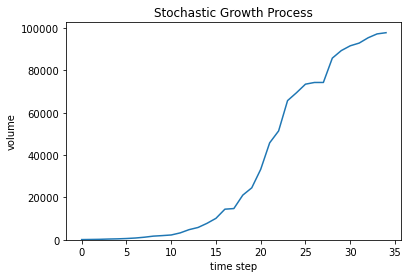

In [3]:
eta = .33
tampw = 100000 

length = range(36)
v = np.zeros(length[-1])
v[0] = 100
for i in length[1:-1]:
    v[i] = v[i-1]*(1+2*eta*np.random.rand()*(1-v[i-1]/tampw))

fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(v,label='growth rate')
ax.set(xlabel='time step', ylabel='volume',
       title='Stochastic Growth Process',ylim = 0)


[(0.0, 129149.15880486925),
 Text(0, 0.5, 'volume'),
 Text(0.5, 0, 'time step'),
 Text(0.5, 1.0, 'Stochastic Growth Process')]

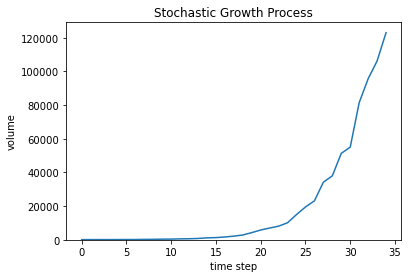

In [4]:
eta = .33
tampw = 100000 

length = range(36)
v = np.zeros(length[-1])
v[0] = 100
for i in length[1:-1]:
    #v[i] = v[i-1]*(1+2*eta*np.random.rand()*(1-v[i-1]/tampw))
    v[i] = v[i-1] *(1+1.5*eta*np.random.rand())

fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(v,label='growth rate')
ax.set(xlabel='time step', ylabel='volume',
       title='Stochastic Growth Process',ylim = 0)

### Product Cost
We create a random process to represent the growth of the cost of production, due to inflation, etc over time.

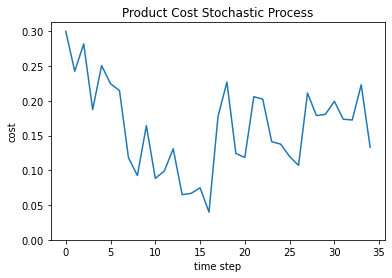

In [5]:
alpha = .5
beta = .2
length = range(36)
p = np.zeros(length[-1])
p[0] = .3
for i in length[1:-1]:
    p[i] = alpha * p[i-1]+beta*np.random.rand() - .01
    
fig, ax = plt.subplots(nrows=1, ncols=1 )
ax.plot(p,label='cost')
ax.set(xlabel='time step', ylabel='cost',
       title='Product Cost Stochastic Process',ylim = 0)

fig.savefig('images/productCost.png')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


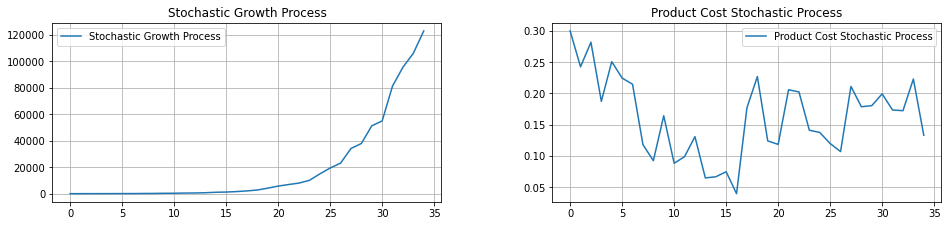

In [6]:
plot = pd.DataFrame({'Stochastic Growth Process':v,'Product Cost Stochastic Process':p})

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5),sharey=False)
fig.tight_layout(pad=8)

plot.plot(y='Stochastic Growth Process',title='Stochastic Growth Process',logy=False,ax=axes[0],grid=True)
plot.plot(y='Product Cost Stochastic Process',title='Product Cost Stochastic Process',logy=False,ax=axes[1],grid=True)

fig.savefig('images/components.eps', format='eps', dpi=300)

## Configuration file

In [7]:
# import libraries
from decimal import Decimal
import numpy as np
from datetime import timedelta

from cadCAD.configuration import Experiment
from cadCAD.configuration.utils import bound_norm_random, ep_time_step, config_sim, access_block

seeds = {
    'a': np.random.RandomState(2)
}

sim_config = config_sim({
    'T': range(36), #number of discrete iterations in each experiement
    'N': 100, #number of times the simulation will be run (Monte Carlo runs)
})

# parameters (later add tuning)
eta = .33 # for tx_volume_generator
tampw = 100000 # transactions limit
alpha = .5 # for data acquisition cost generator
beta = .2 # for data acquisition cost generator
costDecrease = .015 # decrease in cost
price = priceWidget.value # sales price
vcRoundFunding = vcRoundFundingWidget.value
overHeadCosts = overHeadCostsWidget.value

# external states
#cell defines the model function for the tx_volume generator stochastic process
def tx_volume_generator(_g, step, sL, s, _input):
    y = 'tx_volume'
    x = s['tx_volume']*(1+2*eta*np.random.rand()*(1-s['tx_volume']/tampw))
    return (y, x)

def product_cost_generator(_g, step, sL, s, _input):
    y = 'product_cost'
    x = alpha*s['product_cost']+beta*np.random.rand() - costDecrease
    return (y, x)

def investors_generator(_g, step, sL, s, _input):
    y = 'seed_money'
    if s['timestep'] == 1:
        x = s['seed_money'] + vcRoundFunding
    elif s['timestep'] == 10:
        x = s['seed_money'] + vcRoundFunding
#     elif s['timestep'] == 50:
#         x = s['seed_money'] + 100000
    else:
        x = s['seed_money'] + 0
    return (y, x)

def update_overhead_costs(_g, step, sL, s, _input):
    # Create step function for updating overhead costs
    y = 'overhead_cost'
    if s['timestep']%15 == 0:
        x = s['overhead_cost'] + overHeadCosts
    else:
        x = s['overhead_cost'] + 0
    return (y, x)

def R_and_D(_g, step, sL, s, _input):
    y = 'R&D'
    if s['timestep']%17 == 0:
        x = s['R&D'] + 1000
    else:
        x = s['R&D'] + 0
    return (y, x) 


# Behaviors
def inflow(_g, step, sL, s):
    # Receive money from relevant parties
    return {'Receive': 1}

def outflow(_g, step, sL, s):
    # Pay relevant parties
    return {'Pay': 1}

def investors(_g, step, sL, s):
    # Pay relevant parties
    if s['timestep'] == 1:
        return {'Invest': 1}
    elif s['timestep'] == 10:
        return {'Invest': 1}
    else:
        return {'Invest': 0}

def metrics(_g, step, sL, s):
    return {'Stat': 1}


# Mechanisms
def receive_fiat_from_consumers(_g, step, sL, s, _input):
    y = 'fiat_reserve'
    if _input['Receive'] == 1:
        x = s['fiat_reserve'] + s['tx_volume'] * price
    else:
        x = s['fiat_reserve']
    return (y, x)

def receive_revenue_from_consumers(_g, step, sL, s, _input):
    y = 'revenue'
    if _input['Receive'] == 1:
        x = s['tx_volume'] * price
    else:
        x = s['revenue']
    return (y, x)


def receive_fiat_from_investors(_g, step, sL, s, _input):
    y = 'fiat_reserve'
    if _input['Invest'] == 1:
        x = s['fiat_reserve'] + s['seed_money']
    else:
        x = s['fiat_reserve']
    return (y, x)

def pay_fiat_to_producers(_g, step, sL, s, _input):
    y = 'fiat_reserve'
    if _input['Pay'] == 1:
        x = s['fiat_reserve'] -  (s['product_cost'] * s['tx_volume']) 
        x = s['fiat_reserve']
    return (y, x)

def pay_investment_expenses(_g, step, sL, s, _input):
    y = 'fiat_reserve'
    if _input['Pay'] == 1:
        x = s['fiat_reserve'] - s['R&D']
    else:
        x = s['fiat_reserve']
    return (y, x)

def pay_overhead_costs(_g, step, sL, s, _input):
    y = 'fiat_reserve'
    if _input['Pay'] == 1:
        x = s['fiat_reserve'] - s['overhead_cost'] 
    else:
        x = s['fiat_reserve']
    return (y, x)

# Metrics

def COGS(_g, step, sL, s, _input):
    y = 'COGS'
    if _input['Stat'] == 1:
        x = (s['product_cost'] * s['tx_volume']) 
    else:
        x = s['COGS']
    return (y, x)

# Initial States
genesis_states = {
    'tx_volume': float(100), #unit: fiat
    'product_cost': float(.3), #unit: fiat cost
    'revenue': float(0), # revenue per month
    'fiat_reserve': float(0),#unit: fiat
    'overhead_cost': float(100), #unit: fiat per month
    'seed_money': float(0),
    'R&D': float(0), #per month
    'COGS': float(0), #per month
    'time': '2018-01-01 00:00:00'
}



#build mechanism dictionary to "wire up the circuit"
mechanisms = [
    #'exogenous':
    {
        'policies':
        {
        },
        'variables':
        {
            'tx_volume': tx_volume_generator,
            'product_cost': product_cost_generator,
            'seed_money': investors_generator,
            'overhead_cost': update_overhead_costs,
            'R&D': R_and_D
        }

    },
    #'fiat inflow':
    {
        'policies':
        {
            'action': inflow
        },
        'variables':
        {
            'fiat_reserve': receive_fiat_from_consumers,
            'revenue': receive_revenue_from_consumers
        }
    },

    #'investors':
    {
        'policies':
        {
            'action': investors
        },
        'variables':
        {
            'seed_money': receive_fiat_from_investors
        }
    },
    #'fiat outflow':
    {
        'policies':
        {
            'action': outflow
        },
        'variables':
        {
            'fiat_reserve': pay_fiat_to_producers,
            'fiat_reserve': pay_investment_expenses,
            'fiat_reserve': pay_overhead_costs
        }
    },
    #'metrics':
    {
        'policies':
        {
            'action': metrics
        },
        'variables':
        {
            'COGS': COGS
        }
    },

]

exp = Experiment()

exp.append_configs(
    sim_configs=sim_config,
    initial_state=genesis_states,
    seeds=seeds,
    partial_state_update_blocks=mechanisms
)




In [8]:
# Run cadCAD

exec_mode = ExecutionMode()
local_mode_ctx = ExecutionContext(context=exec_mode.local_mode)

simulation = Executor(exec_context=local_mode_ctx, configs=configs)
raw_system_events, tensor_field, sessions = simulation.execute()
# Result System Events DataFrame
df = pd.DataFrame(raw_system_events)
    
    


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (36, 1, 100, 9)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
SubsetIDs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
N

## Results
In the background, we finish defining a configuration file that contains the mathematical specifications and simulation commands, examples of which are shown in the previous section, and we run our model.
We look at the results at the beginning and the end of our model to see we started on 2019-03-01 and allowed our model to evolve until 2020-02-24. 

In [9]:
df.head(5)

,tx_volume,product_cost,revenue,fiat_reserve,overhead_cost,seed_money,R&D,COGS,time,simulation,subset,run,substep,timestep
0,100.000,0.300,0.000,0.000,100.000,0.000,0.000,0.000,2018-01-01 00:00:00,0,0,1,0,0
1,109.198,0.320,0.000,0.000,5100.000,0.000,1000.000,0.000,2018-01-01 00:00:00,0,0,1,1,1
2,109.198,0.320,109.198,109.198,5100.000,0.000,1000.000,0.000,2018-01-01 00:00:00,0,0,1,2,1
3,109.198,0.320,109.198,109.198,5100.000,0.000,1000.000,0.000,2018-01-01 00:00:00,0,0,1,3,1
4,109.198,0.320,109.198,-4990.802,5100.000,0.000,1000.000,0.000,2018-01-01 00:00:00,0,0,1,4,1


In [10]:
df.tail(5)

,tx_volume,product_cost,revenue,fiat_reserve,overhead_cost,seed_money,R&D,COGS,time,simulation,subset,run,substep,timestep
18095,91022.670,0.232,89672.064,416970.713,15100.000,200000.000,3000.000,17467.707,2018-01-01 00:00:00,0,0,100,1,36
18096,91022.670,0.232,91022.670,507993.382,15100.000,200000.000,3000.000,17467.707,2018-01-01 00:00:00,0,0,100,2,36
18097,91022.670,0.232,91022.670,507993.382,15100.000,200000.000,3000.000,17467.707,2018-01-01 00:00:00,0,0,100,3,36
18098,91022.670,0.232,91022.670,492893.382,15100.000,200000.000,3000.000,17467.707,2018-01-01 00:00:00,0,0,100,4,36
18099,91022.670,0.232,91022.670,492893.382,15100.000,200000.000,3000.000,21128.268,2018-01-01 00:00:00,0,0,100,5,36


In [11]:
mean_df,median_df,std_df,min_df = c2F.aggregate_runs(df,'timestep')

We examine the Fiat Reserve in more depth and fit a line a to the plot to show the trajectory. As we can see from the plot below, the fiat reserve is increasing throughout the time period studied. 

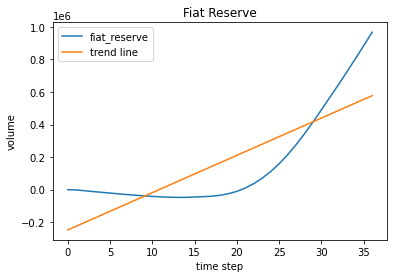

In [12]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(mean_df['fiat_reserve'])),mean_df['fiat_reserve'],1,full=True)
plt.plot(mean_df['fiat_reserve'],label='fiat_reserve')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(mean_df['fiat_reserve']))],label='trend line')
plt.title('Fiat Reserve')
plt.xlabel('time step')
plt.ylabel('volume')
#plt.ylim(0)
plt.legend()

We also examine the transaction volume, and as it is an exogenous (external to the system) process, it follows the same s-shaped curve we built as an individual component above. 

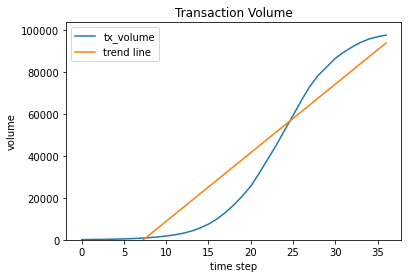

In [13]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(mean_df['tx_volume'])),mean_df['tx_volume'],1,full=True)
plt.plot(mean_df['tx_volume'],label='tx_volume')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(mean_df['tx_volume']))],label='trend line')
plt.title('Transaction Volume')
plt.xlabel('time step')
plt.ylabel('volume')
plt.ylim(0)
plt.legend()

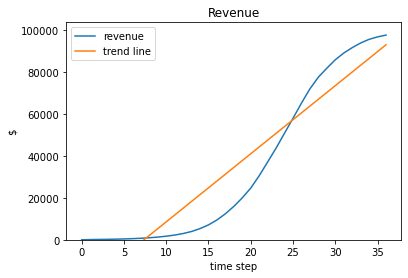

In [14]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(mean_df['revenue'])),mean_df['revenue'],1,full=True)
plt.plot(mean_df['revenue'],label='revenue')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(mean_df['revenue']))],label='trend line')
plt.title('Revenue')
plt.xlabel('time step')
plt.ylabel('$')
plt.ylim(0)
plt.legend()

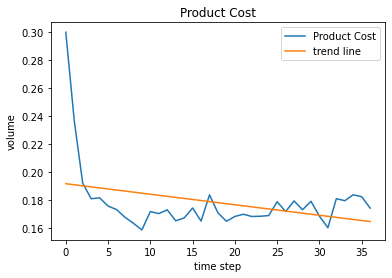

In [15]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(mean_df['product_cost'])),mean_df['product_cost'],1,full=True)
plt.plot(mean_df['product_cost'],label='Product Cost')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(mean_df['product_cost']))],label='trend line')
plt.title('Product Cost')
plt.xlabel('time step')
plt.ylabel('volume')
plt.legend()

We plotted the results of the simulation below in figure. We can see that the Fiat Reserve initially decreased into negative territory while the company was getting started (we are assuming the model starts at day one of the company, or new business venture). Initially the company receives an injection of capital through VC seed money, although this trails off over time as the company matures. The overhead costs steadily increase through the simulation, however the product cost varies significantly, but is on downward sloping trend and the company becomes more efficient. We see that revenue starts off at 0 and takes a while to ramp up (as would be expected for a start-up, hence the initial cash flow problem). And finally, we examine the transaction volume, and as it is an exogenous (external to the system) process, it follows the same s-shaped curve we built as an individual component above. 

In [16]:
# Calculate the metrics
mean_df['RevenueQuarterlyPercentageChange']= mean_df['revenue'].pct_change(periods=3)
mean_df['GrossMargin'] = df['revenue'] - df['COGS']
mean_df['EBITDA'] = df['revenue'] - df['COGS'] - df['overhead_cost'] - df['R&D']

In [17]:
mean_df.head()

,timestep,tx_volume,product_cost,revenue,fiat_reserve,overhead_cost,seed_money,R&D,COGS,simulation,subset,run,substep,RevenueQuarterlyPercentageChange,GrossMargin,EBITDA
0,0,100.000,0.300,0.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,50.500,0.000,nan,0.000,-100.000
1,1,130.706,0.237,104.565,-1935.435,5100.000,0.000,1000.000,6.158,0.000,0.000,50.500,3.000,nan,0.000,-6100.000
2,2,176.660,0.192,167.469,-6867.966,5100.000,100000.000,1000.000,31.408,0.000,0.000,50.500,3.000,nan,109.198,-5990.802
3,3,231.722,0.181,220.709,-11747.256,5100.000,100000.000,1000.000,35.425,0.000,0.000,50.500,3.000,inf,109.198,-5990.802
4,4,318.298,0.182,300.983,-16546.273,5100.000,100000.000,1000.000,44.639,0.000,0.000,50.500,3.000,1.878,109.198,-5990.802


In [18]:
mean_df.tail()

,timestep,tx_volume,product_cost,revenue,fiat_reserve,overhead_cost,seed_money,R&D,COGS,simulation,subset,run,substep,RevenueQuarterlyPercentageChange,GrossMargin,EBITDA
32,32,92038.889,0.181,91543.066,644041.303,15100.000,200000.000,2000.000,14722.588,0.000,0.000,50.500,3.000,0.120,511.201,-5588.799
33,33,94202.281,0.180,93769.603,722710.906,15100.000,200000.000,2000.000,16626.221,0.000,0.000,50.500,3.000,0.093,511.201,-5588.799
34,34,95827.778,0.184,95502.678,803113.585,15100.000,200000.000,2000.000,17022.160,0.000,0.000,50.500,3.000,0.073,511.201,-5588.799
35,35,96883.309,0.182,96672.203,884685.788,15100.000,200000.000,3000.000,17588.111,0.000,0.000,50.500,3.000,0.056,519.158,-5580.842
36,36,97675.794,0.174,97517.297,967103.084,15100.000,200000.000,3000.000,17560.937,0.000,0.000,50.500,3.000,0.040,519.158,-5580.842


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

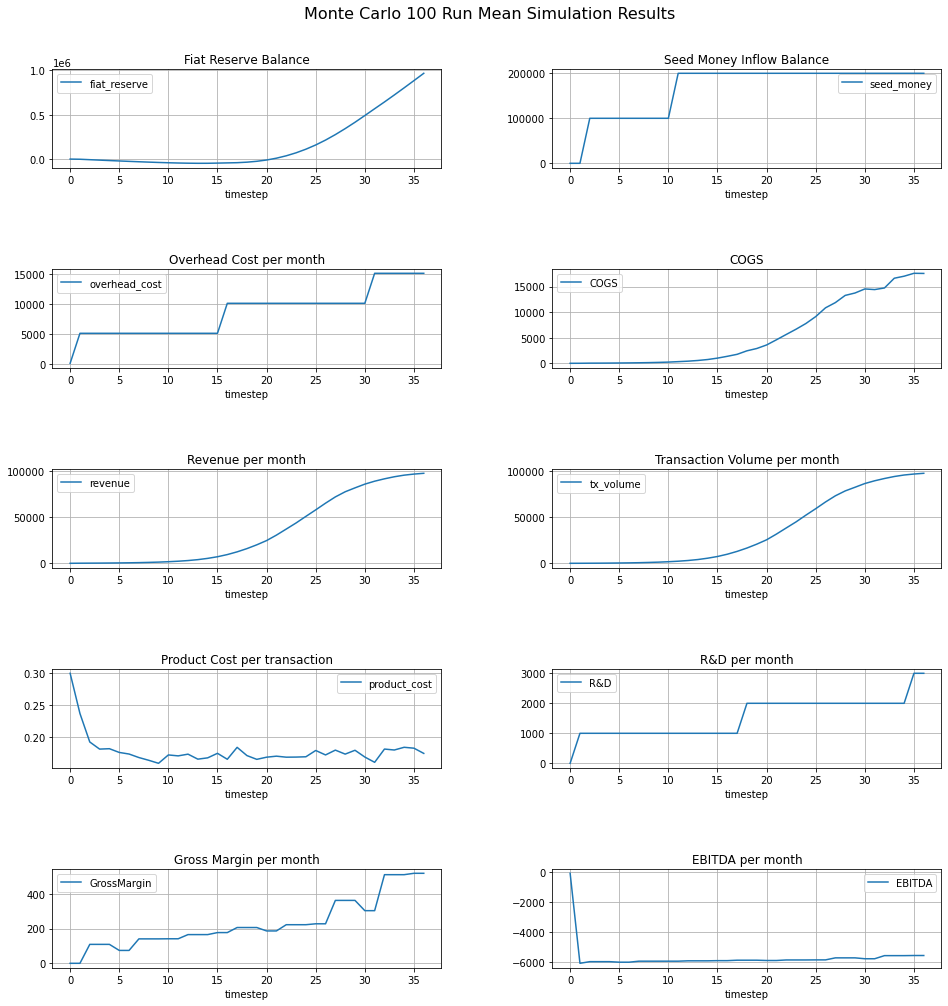

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15, 15),sharey=False)
fig.tight_layout(pad=8)

fig.suptitle("Monte Carlo 100 Run Mean Simulation Results", fontsize=16)

mean_df.plot(x = 'timestep',y='fiat_reserve',title='Fiat Reserve Balance',logy=False,ax=axes[0,0],grid=True)
mean_df.plot(x = 'timestep',y='seed_money',title='Seed Money Inflow Balance',logy=False,ax=axes[0,1],grid=True)
mean_df.plot(x = 'timestep',y='overhead_cost',title='Overhead Cost per month',logy=False,ax=axes[1,0],grid=True)
mean_df.plot(x = 'timestep',y='COGS',title='COGS',logy=False,ax=axes[1,1],grid=True)
mean_df.plot(x = 'timestep',y='revenue',title='Revenue per month',logy=False,ax=axes[2,0],grid=True)
mean_df.plot(x = 'timestep',y='tx_volume',title='Transaction Volume per month',logy=False,ax=axes[2,1],grid=True)
mean_df.plot(x = 'timestep',y='product_cost',title='Product Cost per transaction',logy=False,ax=axes[3,0],grid=True)
mean_df.plot(x = 'timestep',y='R&D',title='R&D per month',logy=False,ax=axes[3,1],grid=True)
#mean_df.plot(x = 'timestep',y='RevenueQuarterlyPercentageChange',title='Revenue Percentage Change per quarter',logy=False,ax=axes[3,1],grid=True)
mean_df.plot(x = 'timestep',y='GrossMargin',title='Gross Margin per month',logy=False,ax=axes[4,0],grid=True)
mean_df.plot(x = 'timestep',y='EBITDA',title='EBITDA per month',logy=False,ax=axes[4,1],grid=True)
fig.savefig('images/Results.eps', format='eps', dpi=300)

## Conclusion

We have walked through a basic dynamical system ecosystem model taking in some external variables and seeing how the system responds to these signals and evolves. We observe that the policy and pricing incentives built into the model represent a successful business model. Now, this is an extremely simplistic model and lacks more rigorous assumptions and testing, but provides an excellent starting point for showing how we model dynamic complex systems. Significantly what makes our modeling approach so powerful, is we can A/B Test, or in other words, try slightly different policies and see how the system interacts and how the outputs we are concerned about respond. It is a very effective mechanism for making business decisions. Our methodologies along with the cadCAD tool allow us to represent a company’s current business model along with the desired future state and help the company make informed, rigorously tested decisions on how to get you from point a to point b.